<a href="https://colab.research.google.com/github/Julio-rs2205/Varios/blob/main/DMC_Peru_Data_Science/Social_networks_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

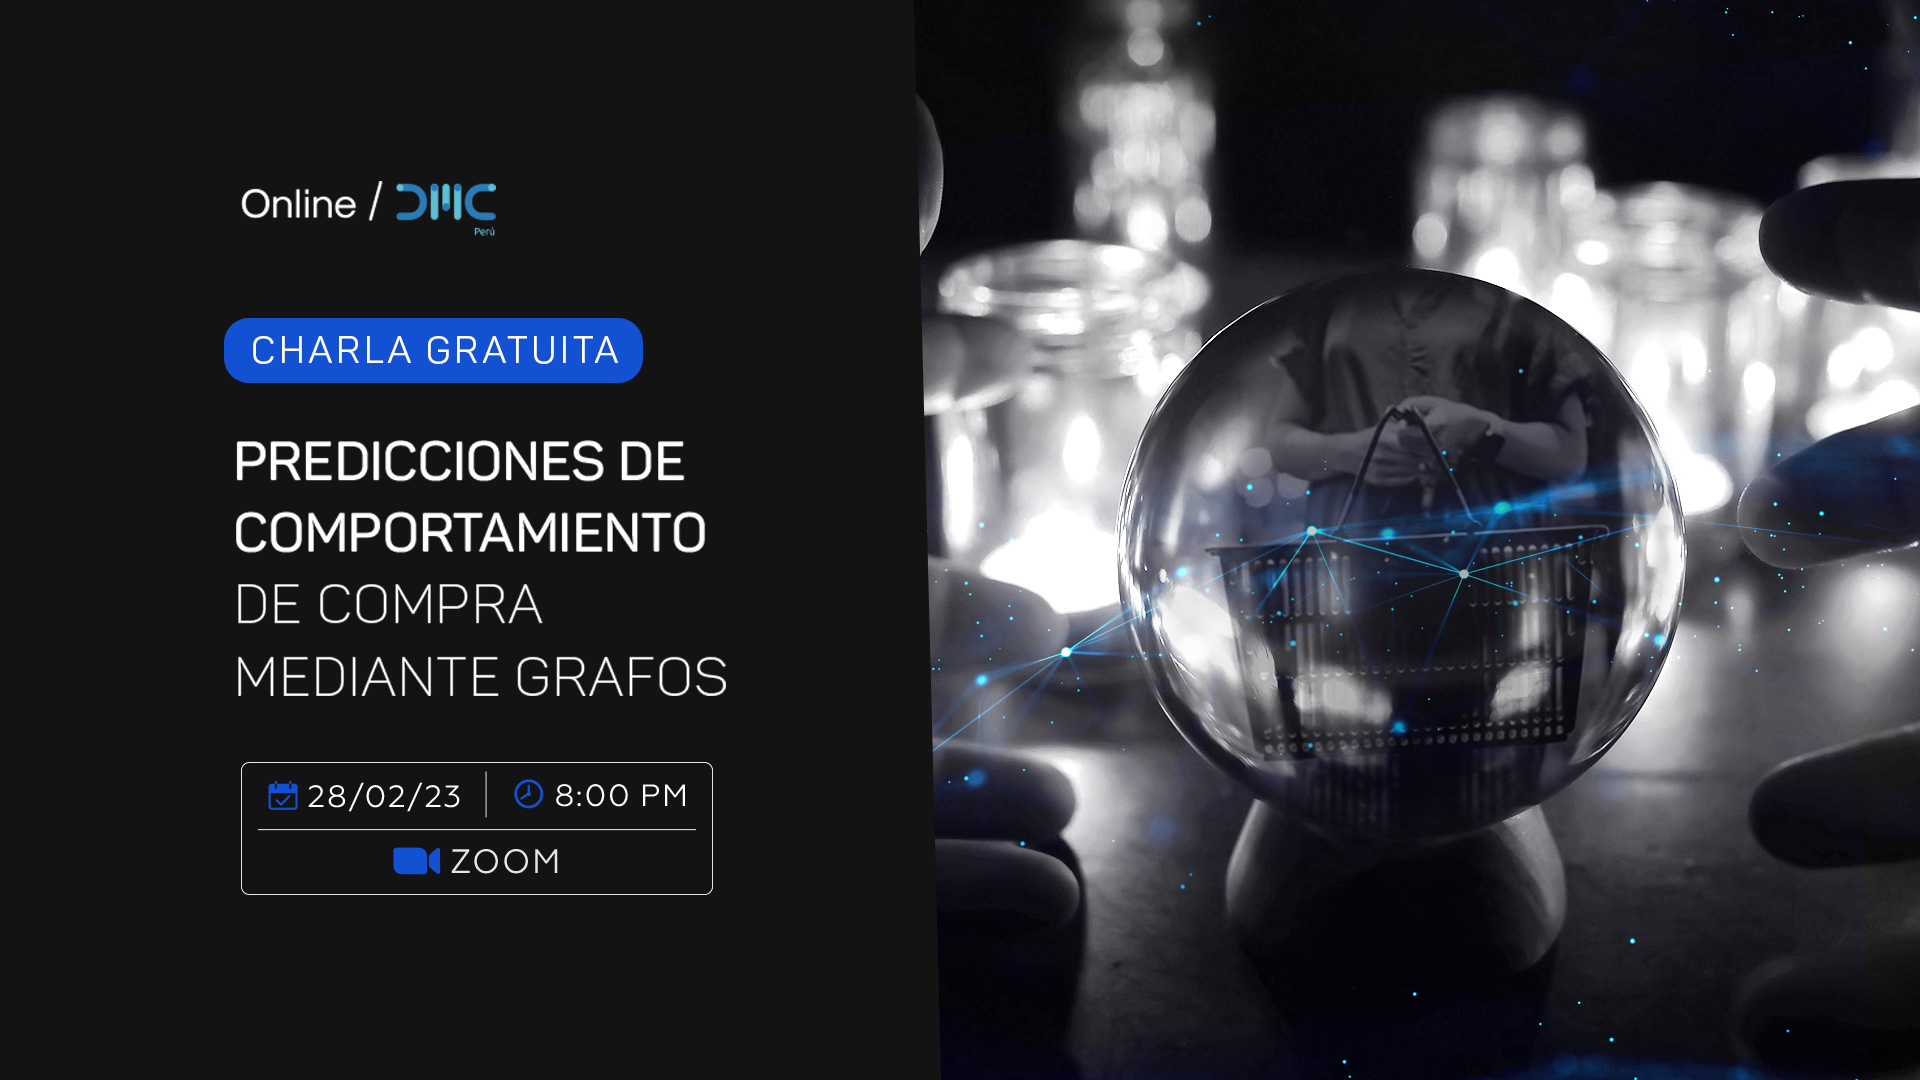

# **Social Network Analysis**

By Edwyn Aldana-Bobadilla

## **Goals**

Traditionally, the machine learning problems are based on **tabular data** representing those attributes and properties associated with the entities of objects of the problem. However, the data problem can convey implicit information that express interrelationships between different problem elements. These  relationships are commonly amenable to be described via a **graph**. 

In this workshop:
1. We present the drawbacks and limitations of the learning approaches based on tabular data.
2. We illustrate how some data problem can convey hidden insights that express interesting relationships that are represented in the form of a graph.
3. We illustrate how these insigths can be included in the analytical process.


## **1. Introduction**

Typically, the Data Analysis involves tabular data in which the rows represent objects or instances associated with the problem to be analyzed (see Figure 1).  
___
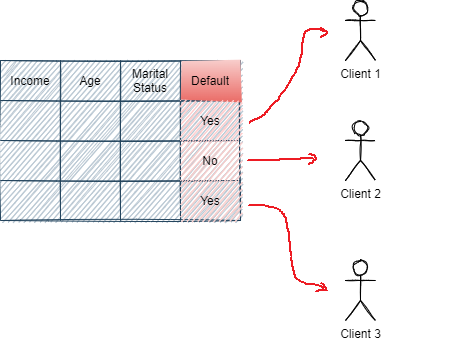

**Figure 1: Traditional tabular data**


___
Formally,  the object's properties are denoted as $X$ and the outcome as $Y$.  We aim to find a model of the form  $f(X)=Y$ from which it is possible to predict the outcome of interest  for a new object. 
___


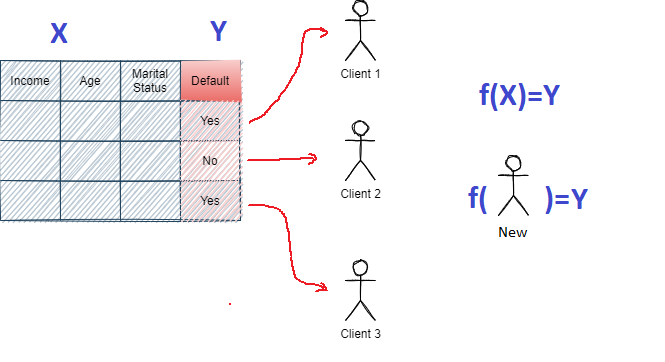

**Figure 2: Modeling from tabular data**

The model $f$ quantifies the relationship between the object's properties and $Y$. However, these may not be the only relationship that can be exist, for instance, we can infer insights about relationships among objects, as it is illustrated in Figure 3.


---
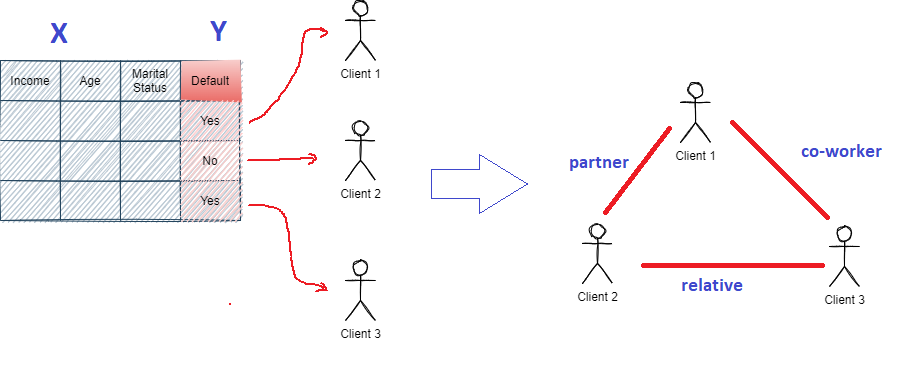

**Fig. 3: Additional findings from data problem**

In many cases, the data problem allow us to find a lot of insights and information in the form of intrinsic relationships. Usually these relationships are amenable to **graph representation and modeling**.

## **2. Background**

## What is Social Network Analysis
1.   Social network analysis (SNA) does not typically analyze data from social network sites like Facebook and Twitter, as many people assume
2.   It is a data mining technique that explores the patterns between people in a network or group.
3. Social networks are typically illustrated through a series of **nodes** and **edges** at show which people (or companies) are connected.
4. SNA is based on a general concept called **community behavior**. It is widely used in **the marketing campaign** by looking at Influencer. 


**Hint:** If you want to sell your products to your customers, convince their friends. We can use social network analysis to understand more about your customers and their communities.

## Metrics of SNA
1. SNA works on the **metric of centrality** and there are many ways to calculate centrality. 
2. Centrality measures tell us who is the most influential person in the network. 
3. Influencers are considered to be the most connected customers in the network. 

The following metrics are widely used:

**Degree centrality**: How many people can this person reach directly?

**Betweenness centrality**: How likely is this person to be the most direct route between two people in the network?

**Closeness centrality**: How fast can this person reach everyone in the network?

**Eigenvector centrality**: How well is this person connected to other well-connected people?




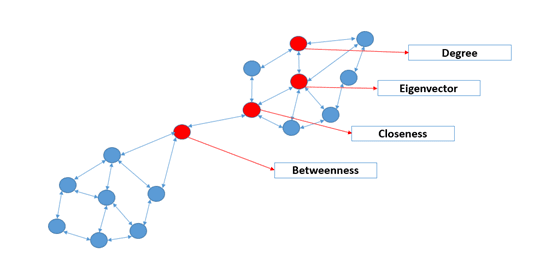

Source: https://analyticsindiamag.com/enhancing-churn-prediction-models-using-social-network-analysis-in-telecom-industry/image-2-6/

## **3. SNA with Python**

###**Using NetwokX**

In [ ]:
!pip install 'networkx<2.7'
!pip install 'scipy>=1.8'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Creating a network

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G_symmetric = nx.Graph()
G_symmetric.add_edge('Juan','Pedro')
G_symmetric.add_edge('Juan','Ana')
G_symmetric.add_edge('Juan','Eva')
G_symmetric.add_edge('Juan','Maria')
G_symmetric.add_edge('Pedro','Ana')
G_symmetric.add_edge('Pedro','Eva')
G_symmetric.add_edge('Pedro','Maria')
G_symmetric.add_edge('Maria','Ana')

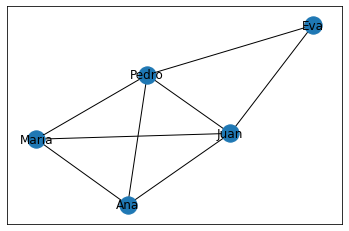

In [ ]:
nx.draw_networkx(G_symmetric)

**Asymmetric Network**

In [ ]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

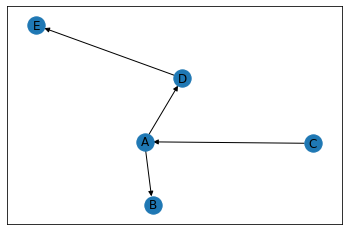

In [ ]:
nx.draw_networkx(G_asymmetric)

**Degree of a node:** Number of connections a node has. NetworkX has the function degree which we can use to determine the degree of a node in the network.

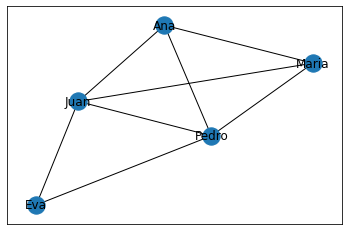

In [ ]:
nx.degree(G_symmetric, 'Juan')

4

In [ ]:
nx.degree(G_symmetric, 'Eva')

2

**Eccentricity**: The largest distance between A and all other nodes.



In [ ]:
nx.eccentricity(G_symmetric,'Eva')

2

In [ ]:
nx.eccentricity(G_symmetric,'Juan')

1

### **Calculating Centrality Measures**

**Degree Centrality**: The people most popular or more liked usually are the ones **who have more friends**.
Degree centrality is a measure of the number of connections a particular node has in the network. 

In [ ]:
nx.degree_centrality(G_symmetric)

{'Juan': 1.0, 'Pedro': 1.0, 'Ana': 0.75, 'Eva': 0.5, 'Maria': 0.75}

**Eigenvector centrality**: This is a measure of how import a node is by accounting for the fact of how well it is connected to other important nodes.

In [ ]:
nx.eigenvector_centrality(G_symmetric)

{'Juan': 0.5100364187624349,
 'Pedro': 0.5100364187624349,
 'Ana': 0.43904190094642953,
 'Eva': 0.3069366734339046,
 'Maria': 0.43904190094642953}

**Closeness Centrality**: This is a measure where each node’s importance is determined by closeness to all other nodes.

In [ ]:
nx.closeness_centrality(G_symmetric)

{'Juan': 1.0,
 'Pedro': 1.0,
 'Ana': 0.8,
 'Eva': 0.6666666666666666,
 'Maria': 0.8}

**Betweenness Centrality**: The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

In [ ]:
nx.betweenness_centrality(G_symmetric)

{'Juan': 0.16666666666666666,
 'Pedro': 0.16666666666666666,
 'Ana': 0.0,
 'Eva': 0.0,
 'Maria': 0.0}

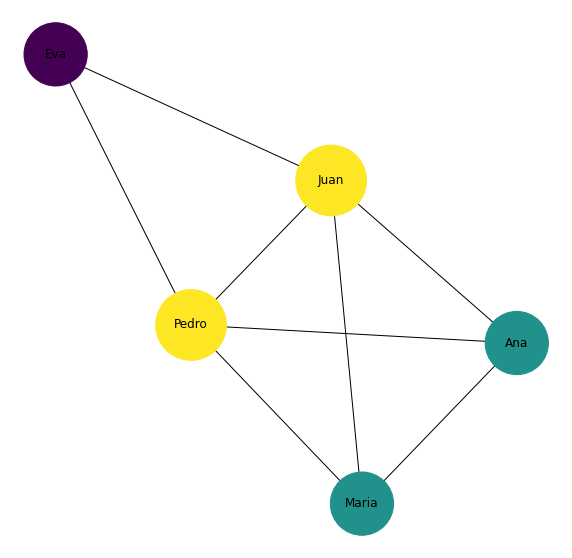

In [ ]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]

plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

## **4. Real Case**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np, pandas as pd
######################################################
#Mount Directory
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(uploaded['data_graph.txt']), header=0, encoding="utf-8",sep="\s")
dataset

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6
...,...,...
88228,4026,4030
88229,4027,4031
88230,4027,4032
88231,4027,4038


In [ ]:

G_fb = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Social Network Analysis/data_graph.txt", create_using = nx.Graph(), nodetype=int)

**Graph Information**

In [ ]:
print(nx.info(G_fb))

Graph with 4039 nodes and 88234 edges


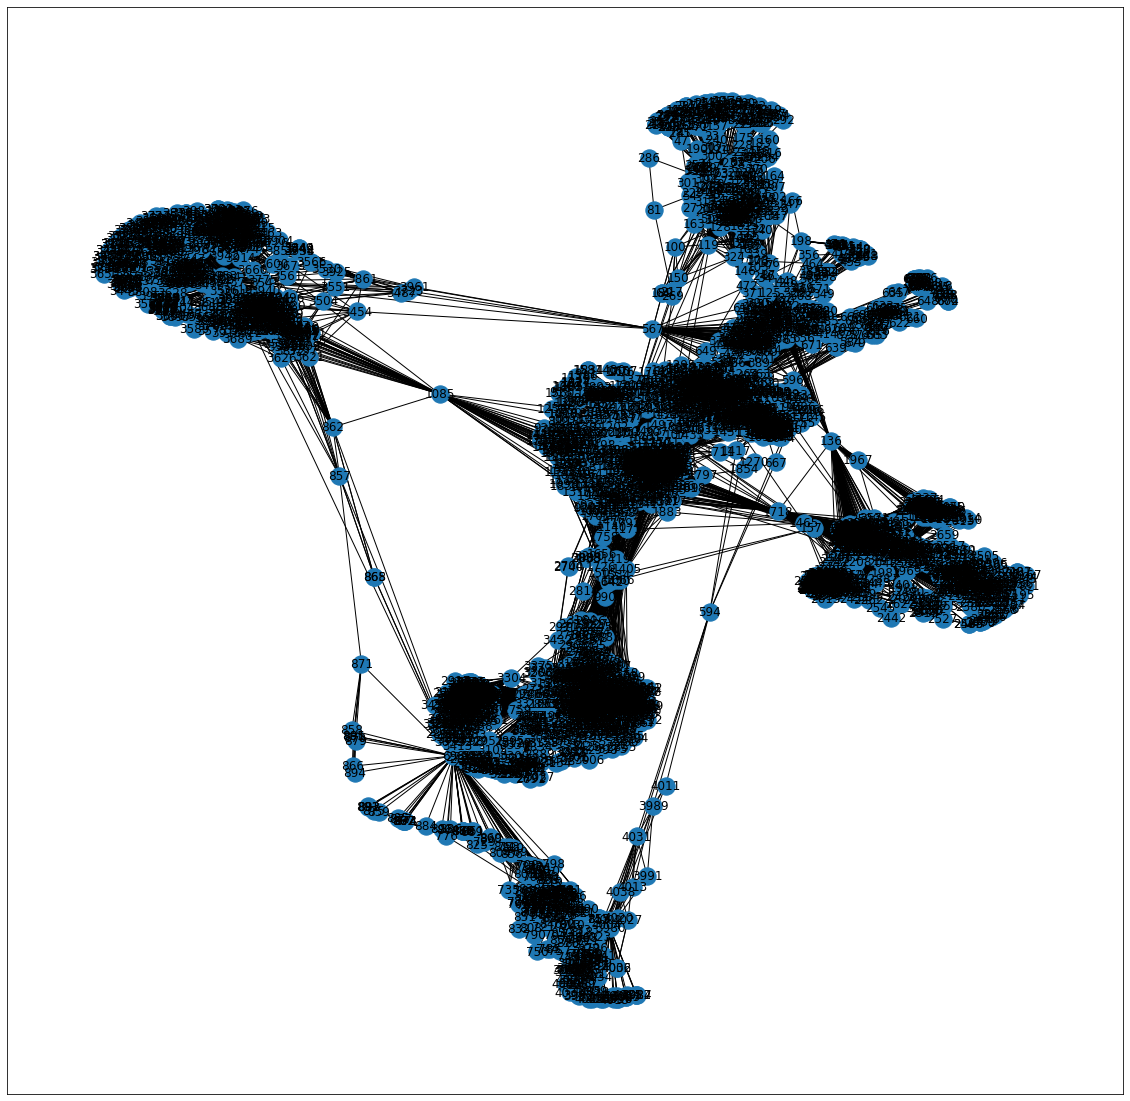

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

(-0.5832912574708462,
 0.8362867783010006,
 -0.7060529839992523,
 1.1621136319637297)

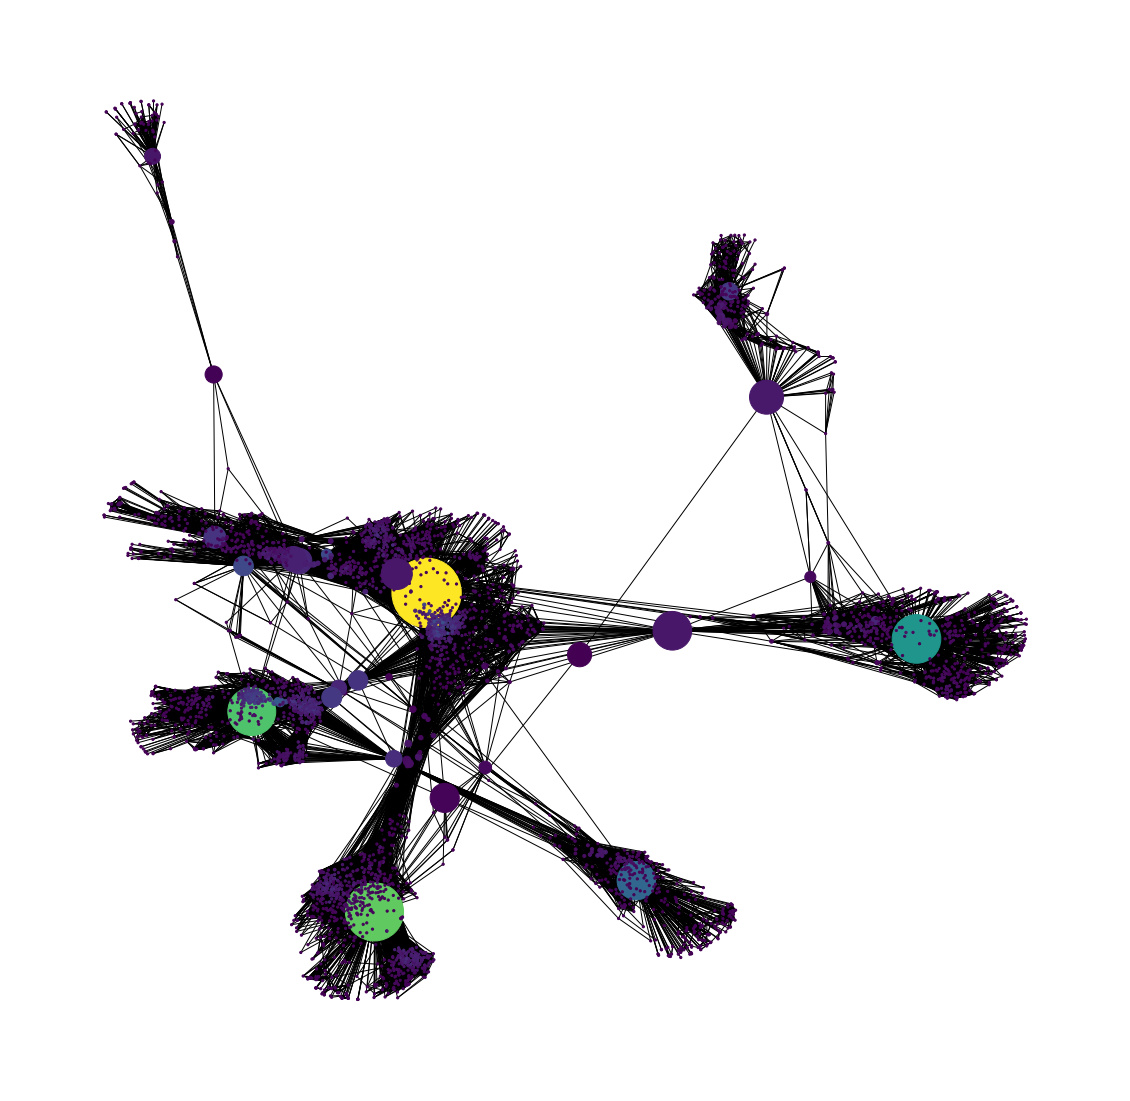

In [ ]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb] #The color depends on the node degree
node_size =  [v * 10000 for v in betCent.values()] #The node size depends on the betweenness
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')